## Shaikat Islam 



## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](https://piazza.com/class/k0grsypt15j73g).

#### Import required libraries

In [2]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [5]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [19]:
n_runs = 16
start_time_sec = time.time()
mlp_lbfgs = MLPClassifierLBFGS(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=200, tol=1e-6,
    random_state=0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_lbfgs.fit(x_tr_N2, y_tr_N)
elapsed_time_sec = time.time() - start_time_sec
print('finished LBFGS run (relu) %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))

def run_mlp_lbfgs_relu_classifier(r_state):
    ''' Runs MLPClassifier model with L-BFGS optimization and rectified linear unit activation function
    based on a predetermined random state, and saves that to the object classifier
    
    Args
    ----
    r_state: int

    Returns
    -------
    classifier: MLPClassifier with L-BFGS optimization with a rectified linear unit activation function 
    and random_state=r_state
    '''
    n_runs = 16
    start_time_sec = time.time()
    classifier = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=r_state,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        classifier.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run (relu) %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        r_state + 1, n_runs, elapsed_time_sec,
        len(classifier.loss_curve_),
        'converged   ' if classifier.did_converge else 'NOT converged',
        classifier.loss_))
    return classifier

# store models for runs 1-15
mlp_lbfgs_relu_1 = run_mlp_lbfgs_relu_classifier(1)
mlp_lbfgs_relu_2 = run_mlp_lbfgs_relu_classifier(2)
mlp_lbfgs_relu_3 = run_mlp_lbfgs_relu_classifier(3)
mlp_lbfgs_relu_4 = run_mlp_lbfgs_relu_classifier(4)
mlp_lbfgs_relu_5 = run_mlp_lbfgs_relu_classifier(5)
mlp_lbfgs_relu_6 = run_mlp_lbfgs_relu_classifier(6)
mlp_lbfgs_relu_7 = run_mlp_lbfgs_relu_classifier(7)
mlp_lbfgs_relu_8 = run_mlp_lbfgs_relu_classifier(8)
mlp_lbfgs_relu_9 = run_mlp_lbfgs_relu_classifier(9)
mlp_lbfgs_relu_10 = run_mlp_lbfgs_relu_classifier(10)
mlp_lbfgs_relu_11 = run_mlp_lbfgs_relu_classifier(11)
mlp_lbfgs_relu_12 = run_mlp_lbfgs_relu_classifier(12)
mlp_lbfgs_relu_13 = run_mlp_lbfgs_relu_classifier(13)
mlp_lbfgs_relu_14 = run_mlp_lbfgs_relu_classifier(14)
mlp_lbfgs_relu_15 = run_mlp_lbfgs_relu_classifier(15)

finished LBFGS run (relu)  1/16 after    0.2 sec |  29 iters | converged    | loss 0.347
finished LBFGS run (relu)  2/16 after    0.2 sec |  29 iters | converged    | loss 0.477
finished LBFGS run (relu)  3/16 after    0.3 sec |  21 iters | converged    | loss 0.347
finished LBFGS run (relu)  4/16 after    1.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run (relu)  5/16 after    0.7 sec |  29 iters | converged    | loss 0.347
finished LBFGS run (relu)  6/16 after    1.7 sec |  29 iters | converged    | loss 0.000
finished LBFGS run (relu)  7/16 after    0.2 sec |  23 iters | converged    | loss 0.000
finished LBFGS run (relu)  8/16 after    0.2 sec |  37 iters | converged    | loss 0.347
finished LBFGS run (relu)  9/16 after    0.4 sec |  15 iters | converged    | loss 0.347
finished LBFGS run (relu) 10/16 after    0.1 sec |  26 iters | converged    | loss 0.000
finished LBFGS run (relu) 11/16 after    0.3 sec |  36 iters | converged    | loss 0.347
finished LBFGS run (r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

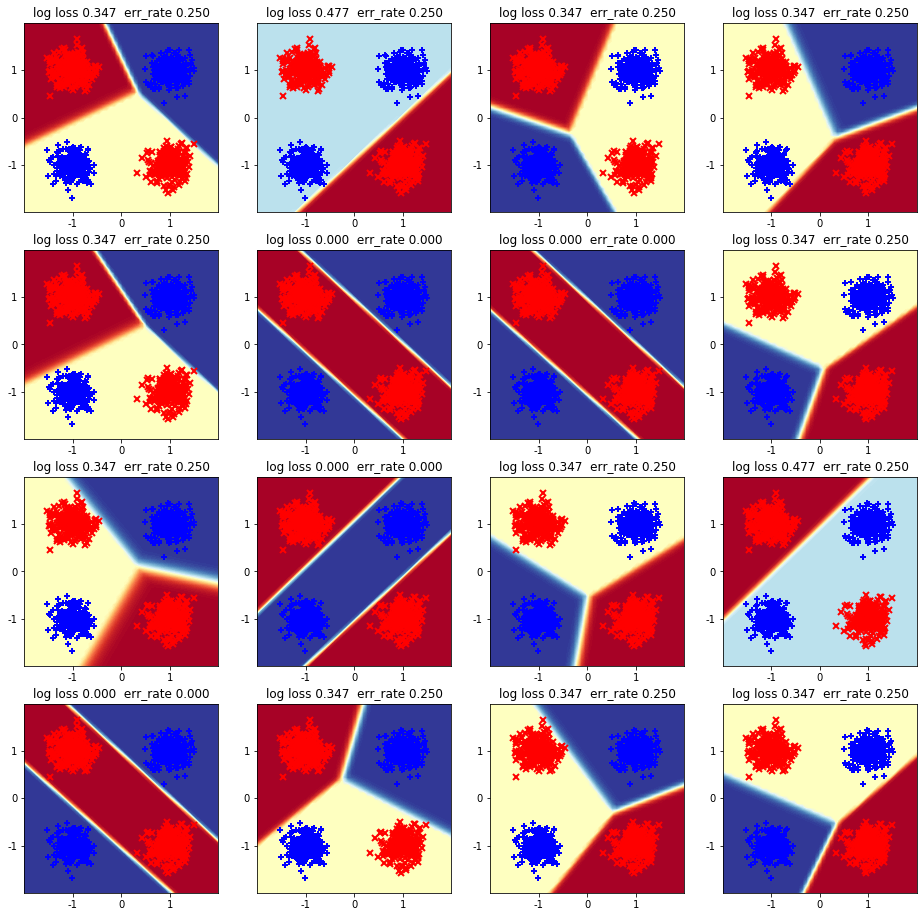

In [20]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

1/4, or 25% of the 16 runs reaches 0 training error. The other models have a log loss within the range of 0.350 and 0.550, and error rates of 0.250. This makes sense in terms of the 2D plots: of the 16 runs, the 4 that have an error rate of 0.000 and log loss of 0.000 are classified into 3 perfect classes where each class is separate from the other. The rest of the runs have an error rate of 0.250, meaning a fourth of the data is misclassified -- in this case, one of the division has a mix of features x1 and x2 within the same class, in the area defined by the yellow region.  I believe that in this case, the LBFGS run in combination with the rectified linear unit activation function tries to reduce the error rate until the weights converge to a learned function g -- this function g has an error rate of .250 which is not ideal. In the four other runs, the models were able to converge to a point where the error rate was 0, which shows the importance of doing more than one run whenever training a MLP. All of the models converged within 15 to 40 iterations within 0.1-0.7 seconds; there does not seem to be a correlaton between convergence time/iteration rate with the error rate of the models. In determining the adjustments to the weights in every node in the network, the MLP model with the L-BFGS solver must have updated the weights in a manner that did not truly find the minimum value of errors (similar to how other classifiers mentioned in class before often have to settle on a local minima, and not the absolute minimum, for sake of computation time and resources). In the adjustment of these weights, the calculation of error updates propogates to every layer behind the output layer, which clarifies why 75% of the 16 runs have an error rate of .250.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [21]:
def run_mlp_lbfgs_sig_classifier(r_state):
    ''' Runs MLPClassifier model with L-BFGS optimization and sigmoid activation function based on a predetermined 
    random state, and saves that to the object classifier
    
    Args
    ----
    r_state: int

    Returns
    -------
    classifier: MLPClassifier with L-BFGS optimization with a sigmoid activation function and random_state=r_state
    '''
    n_runs = 16
    start_time_sec = time.time()
    classifier = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=r_state,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        classifier.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS (sigmoid activation) run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        r_state + 1, n_runs, elapsed_time_sec,
        len(classifier.loss_curve_),
        'converged   ' if classifier.did_converge else 'NOT converged',
        classifier.loss_))
    return classifier

# store models for runs 0-15
mlp_lbfgs_sig_0 = run_mlp_lbfgs_sig_classifier(0)
mlp_lbfgs_sig_1 = run_mlp_lbfgs_sig_classifier(1)
mlp_lbfgs_sig_2 = run_mlp_lbfgs_sig_classifier(2)
mlp_lbfgs_sig_3 = run_mlp_lbfgs_sig_classifier(3)
mlp_lbfgs_sig_4 = run_mlp_lbfgs_sig_classifier(4)
mlp_lbfgs_sig_5 = run_mlp_lbfgs_sig_classifier(5)
mlp_lbfgs_sig_6 = run_mlp_lbfgs_sig_classifier(6)
mlp_lbfgs_sig_7 = run_mlp_lbfgs_sig_classifier(7)
mlp_lbfgs_sig_8 = run_mlp_lbfgs_sig_classifier(8)
mlp_lbfgs_sig_9 = run_mlp_lbfgs_sig_classifier(9)
mlp_lbfgs_sig_10 = run_mlp_lbfgs_sig_classifier(10)
mlp_lbfgs_sig_11 = run_mlp_lbfgs_sig_classifier(11)
mlp_lbfgs_sig_12 = run_mlp_lbfgs_sig_classifier(12)
mlp_lbfgs_sig_13 = run_mlp_lbfgs_sig_classifier(13)
mlp_lbfgs_sig_14 = run_mlp_lbfgs_sig_classifier(14)
mlp_lbfgs_sig_15 = run_mlp_lbfgs_sig_classifier(15)

finished LBFGS (sigmoid activation) run  1/16 after    0.6 sec |  58 iters | converged    | loss 0.000
finished LBFGS (sigmoid activation) run  2/16 after    0.7 sec | 114 iters | converged    | loss 0.347
finished LBFGS (sigmoid activation) run  3/16 after    0.1 sec |  45 iters | converged    | loss 0.347
finished LBFGS (sigmoid activation) run  4/16 after    0.2 sec |  77 iters | converged    | loss 0.000
finished LBFGS (sigmoid activation) run  5/16 after    0.1 sec |  40 iters | converged    | loss 0.477
finished LBFGS (sigmoid activation) run  6/16 after    0.1 sec |  42 iters | converged    | loss 0.000
finished LBFGS (sigmoid activation) run  7/16 after    0.2 sec |  50 iters | converged    | loss 0.000
finished LBFGS (sigmoid activation) run  8/16 after    0.0 sec |  14 iters | converged    | loss 0.537
finished LBFGS (sigmoid activation) run  9/16 after    0.1 sec |  62 iters | converged    | loss 0.347
finished LBFGS (sigmoid activation) run 10/16 after    0.1 sec | 141 iter

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

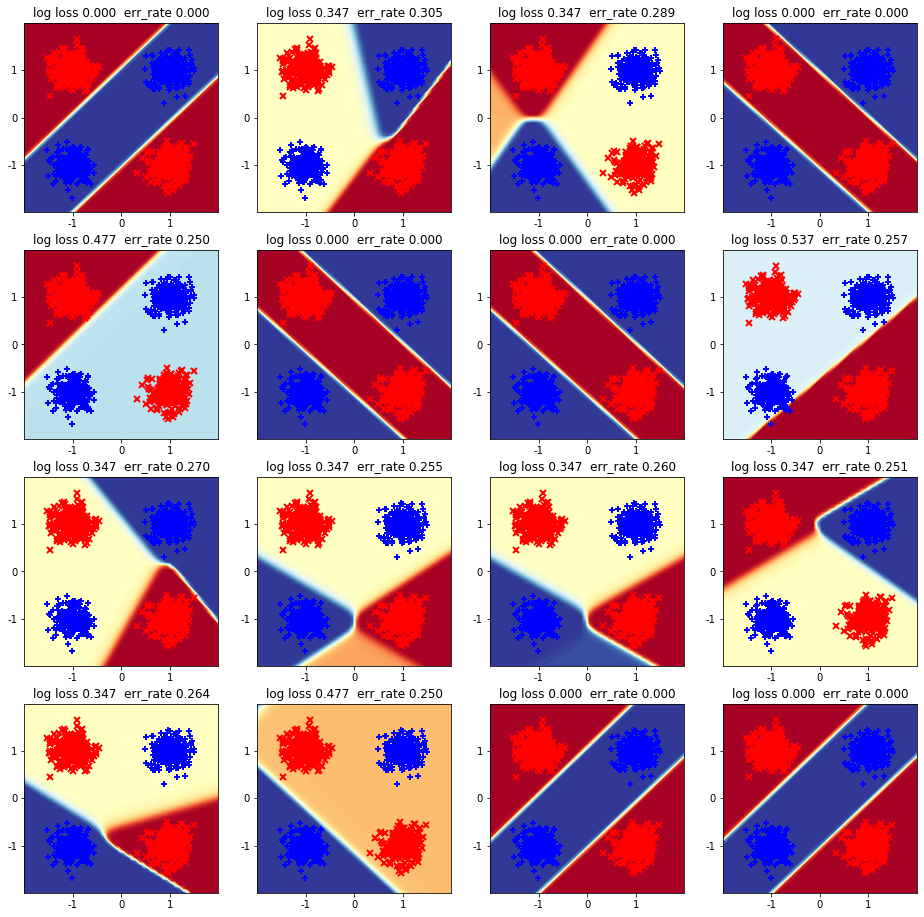

In [22]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_0, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

6/16 runs reach 0 training error. The rest have an error rate between 0.250 and 0.350, with a log loss between 0.347 and 0.537. In this case, compared to the MLP classifier with the ReLU activation function, the number of models with 0 training error increases, and the average time to converge to optimal weights is faster, but the number of iterations ranges from 14 to 141 iterations (which is larger in terms of the average number of iterations). This makes a bit more sense in terms of the data, as a logistic activation function provides more diversity in terms of class outputs (whereas a linear activation function like the ReLU may have more distinct, linear classes). These runs converged within 0.1-0.7 seconds, which is noticeably faster than the relu ReLU activation function.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [32]:
# run 0
n_runs = 16
start_time_sec = time.time()
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=400, tol=1e-8,
    random_state=0,
    solver='sgd', batch_size=10,
    learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_sgd.fit(x_tr_N2, y_tr_N)
mlp_sgd.did_converge = True if len(warn_list) == 0 else False
elapsed_time_sec = time.time() - start_time_sec
print('finished SGD run (relu) %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))


def run_mlp_sgd_relu_classifier(r_state):
    ''' Runs MLPClassifier model with SGD optimization and rectified linear unit activation function
    based on a predetermined random state, and saves that to the object classifier
    
    Args
    ----
    r_state: int

    Returns
    -------
    classifier: MLPClassifier with SGD optimization with a rectified linear unit activation function 
    and random_state=r_state
    '''
    n_runs = 16
    start_time_sec = time.time()
    classifier = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=r_state,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        classifier.fit(x_tr_N2, y_tr_N)
    classifier.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run (relu) %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        1 + r_state, n_runs, elapsed_time_sec,
        len(classifier.loss_curve_),
            'converged    ' if classifier.did_converge else 'NOT converged',
            classifier.loss_))
    return classifier

# store models for runs 1-15 
mlp_sgd_relu_1 = run_mlp_sgd_relu_classifier(1)
mlp_sgd_relu_2 = run_mlp_sgd_relu_classifier(2)
mlp_sgd_relu_3 = run_mlp_sgd_relu_classifier(3)
mlp_sgd_relu_4 = run_mlp_sgd_relu_classifier(4)
mlp_sgd_relu_5 = run_mlp_sgd_relu_classifier(5)
mlp_sgd_relu_6 = run_mlp_sgd_relu_classifier(6)
mlp_sgd_relu_7 = run_mlp_sgd_relu_classifier(7)
mlp_sgd_relu_8 = run_mlp_sgd_relu_classifier(8)
mlp_sgd_relu_9 = run_mlp_sgd_relu_classifier(9)
mlp_sgd_relu_10 = run_mlp_sgd_relu_classifier(10)
mlp_sgd_relu_11 = run_mlp_sgd_relu_classifier(11)
mlp_sgd_relu_12 = run_mlp_sgd_relu_classifier(12)
mlp_sgd_relu_13 = run_mlp_sgd_relu_classifier(13)
mlp_sgd_relu_14 = run_mlp_sgd_relu_classifier(14)
mlp_sgd_relu_15 = run_mlp_sgd_relu_classifier(15)

finished SGD run (relu)  1/16 after    5.3 sec | 267 epochs | converged     | loss 0.347
finished SGD run (relu)  2/16 after    5.6 sec | 307 epochs | converged     | loss 0.478
finished SGD run (relu)  3/16 after    4.4 sec | 239 epochs | converged     | loss 0.347
finished SGD run (relu)  4/16 after    7.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run (relu)  5/16 after    5.2 sec | 275 epochs | converged     | loss 0.347
finished SGD run (relu)  6/16 after    7.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run (relu)  7/16 after    7.4 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run (relu)  8/16 after    5.0 sec | 273 epochs | converged     | loss 0.347
finished SGD run (relu)  9/16 after    4.1 sec | 219 epochs | converged     | loss 0.347
finished SGD run (relu) 10/16 after    7.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run (relu) 11/16 after    7.6 sec | 394 epochs | converged     | loss 0.478
finished SGD run (rel

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

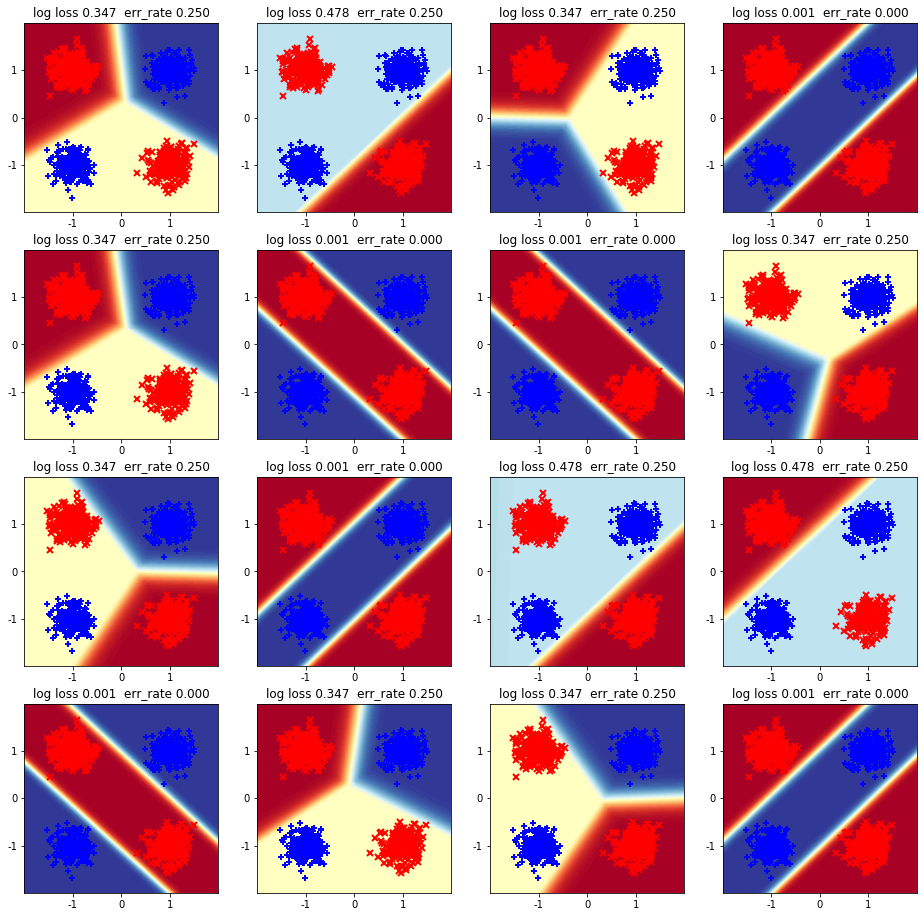

In [33]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

6/16 of the runs reach 0 training error, but they also have a log loss of 0.001, which differs from the runs described in part 1 with the same ReLU activation, which had a log loss of 0.000. In comparison to the first run, it takes a much longer time for the classifiers to reach a convergence point (out of the classifiers that did actually converge), and they do so within 200 to 300 epochs (iterations). Seven classifiers did not converge out of the sixteen, and out of those seven, six of them were the classifiers that reached 0 training error. The tradeoff between L-BFGS and SGD seems to be that of the number of iterations one is willing to train a model to train a model, and the possibility that models will not converge at an optimal stopping point.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

The most noticeable difference is the number of models that did reach 0 training error (the SGD batch had more of them), the time it took for models to converge (the L-BFGS models took a lot less time to converge), and the number of iterations that each batch ran for (the SGD models had a max_iter of 400). Furthermore, all 6 models within the SGD batch that did have 0 training error did not converge on an optimal set of weights. I believe this is because SGD relies on calculating weights based on subsets of training data, whereas L-BFGS may not have to use such a calculation -- furthermore, in this case, the max_iter was set to 400, which should take more time than L-BFGS, which has a max_iter=200 in part 1 (although in part 1, the models converged within 20-30 iterations, not 200-400). It is harder to measure convergence with SGD, and in the cases where convergence is not reached, a "bad local minima" (https://arxiv.org/pdf/1906.02613.pdf) may have been reached. According to this paper, published by Stanford researchers (https://cs.stanford.edu/~acoates/papers/LeNgiCoaLahProNg11.pdf), SGD has worse parameter tuning and convergence optimization L-BFGS, and should be faster than L-BFGS -- however, in this case, SGD may have come across data that requires the classifier to inoptimally converge on weights that are not perfect -- such as in the case of a bad minima -- which can explain the lack of convergence in some of the models.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [37]:
def run_mlp_sgd_sig_classifier(r_state):
    ''' Runs MLPClassifier model with SGD optimization and sigmoid activation function
    based on a predetermined random state, and saves that to the object classifier
    
    Args
    ----
    r_state: int

    Returns
    -------
    classifier: MLPClassifier with SGD optimization with a sigmoid activation function 
    and random_state=r_state
    '''
    n_runs = 16
    start_time_sec = time.time()
    classifier = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=r_state,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        classifier.fit(x_tr_N2, y_tr_N)
    classifier.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run (logistic) %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        1 + r_state, n_runs, elapsed_time_sec,
        len(classifier.loss_curve_),
            'converged    ' if classifier.did_converge else 'NOT converged',
            classifier.loss_))
    return classifier

# store models for runs 0-15 
mlp_sgd_sig_0 = run_mlp_sgd_sig_classifier(0)
mlp_sgd_sig_1 = run_mlp_sgd_sig_classifier(1)
mlp_sgd_sig_2 = run_mlp_sgd_sig_classifier(2)
mlp_sgd_sig_3 = run_mlp_sgd_sig_classifier(3)
mlp_sgd_sig_4 = run_mlp_sgd_sig_classifier(4)
mlp_sgd_sig_5 = run_mlp_sgd_sig_classifier(5)
mlp_sgd_sig_6 = run_mlp_sgd_sig_classifier(6)
mlp_sgd_sig_7 = run_mlp_sgd_sig_classifier(7)
mlp_sgd_sig_8 = run_mlp_sgd_sig_classifier(8)
mlp_sgd_sig_9 = run_mlp_sgd_sig_classifier(9)
mlp_sgd_sig_10 = run_mlp_sgd_sig_classifier(10)
mlp_sgd_sig_11 = run_mlp_sgd_sig_classifier(11)
mlp_sgd_sig_12 = run_mlp_sgd_sig_classifier(12)
mlp_sgd_sig_13 = run_mlp_sgd_sig_classifier(13)
mlp_sgd_sig_14 = run_mlp_sgd_sig_classifier(14)
mlp_sgd_sig_15 = run_mlp_sgd_sig_classifier(15)

finished SGD run (logistic)  1/16 after    2.4 sec | 161 epochs | converged     | loss 0.693
finished SGD run (logistic)  2/16 after    5.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  3/16 after    5.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  4/16 after    3.1 sec | 215 epochs | converged     | loss 0.693
finished SGD run (logistic)  5/16 after    5.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic)  6/16 after    6.2 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  7/16 after    5.9 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  8/16 after    5.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic)  9/16 after    5.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic) 10/16 after    5.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic) 11/16 after    1.8 sec | 124 epochs | conv

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

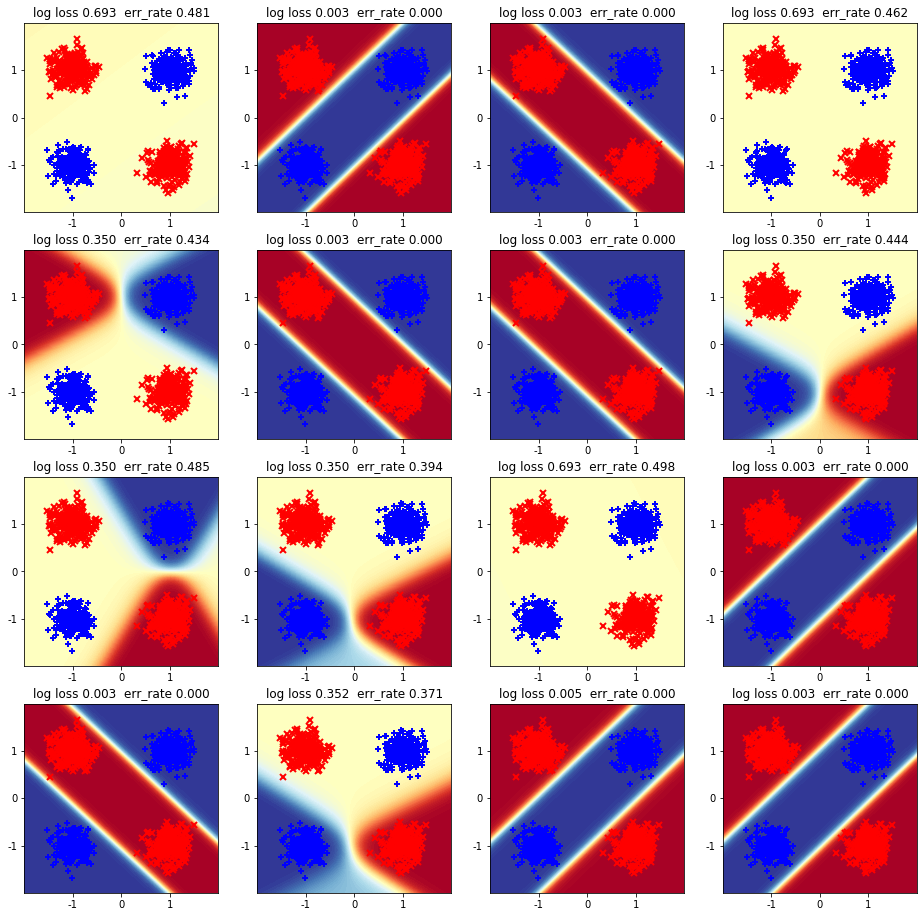

In [38]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd_sig_0, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

Half of the models within this batch of 16 runs have reached a training error of 0. All of the models that did reach a training error of 0 did not converge, similarly to the previous subpart, where the activtion function being used was the ReLU. In this part, the majority of models did not converge on an optimal weight, with three out of the sixteen runs actually converging. These three converging models did not reach a training error of 0. In comparison to the part 3, the time it takes for convergence is about the same, but a lot larger than the time it took for the models in part 2 to converge (using the sigmoid as an activation function).

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

The most noticable difference, as in the case with the difference between the models with the SGD+ReLU and L-BFGS+ReLU, is that the number of iterations is much greater (400 v. 20-30), the time it takes for models to converge is a lot greater (a few seconds, vs milliseconds), as well as the general number of models with 0 training error (8 vs. 6). The difference in the number of iterations is due to the difference in the calculation of gradient descent (the SGD seems to take a lot longer to converge and calculate weights, and seems to do so in a way that is computationally taxing in comparison to the L-BFGS). This may be attributable to how these weights are optimized, as discussed within question 3c.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

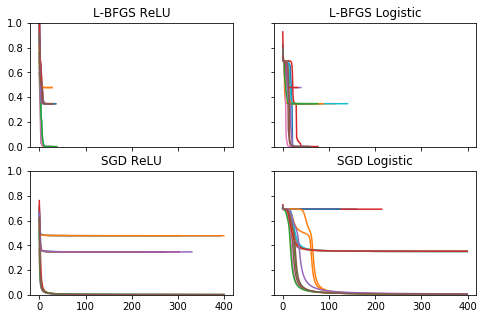

In [41]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,0].plot(mlp_lbfgs.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_1.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_2.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_3.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_4.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_5.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_6.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_7.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_8.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_9.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_10.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_11.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_12.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_13.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_14.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_15.loss_curve_)
ax_grid[0,1].set_title('L-BFGS Logistic')
ax_grid[0,1].plot(mlp_lbfgs_sig_0.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_1.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_2.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_3.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_4.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_5.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_6.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_7.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_8.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_9.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_10.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_11.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_12.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_13.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_14.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_15.loss_curve_) 
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,0].plot(mlp_sgd.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_1.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_2.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_3.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_4.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_5.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_6.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_7.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_8.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_9.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_10.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_11.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_12.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_13.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_14.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_15.loss_curve_) 
ax_grid[1,1].set_title('SGD Logistic')
ax_grid[1,1].plot(mlp_sgd_sig_0.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_1.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_2.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_3.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_4.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_5.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_6.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_7.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_8.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_9.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_10.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_11.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_12.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_13.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_14.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_15.loss_curve_) 
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

It seems the ReLU seems easier to optimize as it reaches convergence within a shorter amount of iterations (comparatively). Of course, in this case, one can say that the ReLU+SGD model has non-convergence, but the number of models that ReLU+SGD that have non-convergence is much smaller compared to the SGD+Sigmoid batch. Thus, it can be confidently said that the ReLU is easier to optimize over a shorter number of iterations. This can be based within the quality of the loss-curves as well (the ReLU curves are more linear and have less curves within them, making it seem that the ReLU activation function is relatively less complex to optimize.) The logistic activation function takes many more iterations, and is harder to optimize, based on the quality of the curves.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

As of right now, I am not that convinced that the ReLU function would be easier to optimize than the sigmoid, due to the seemingly narrow set of conditions that this assignment has been based on. In the course of this assignment, 16 runs have been done for each part, which I would definitely increase in another iteration of this experiment (possibly a sample size within the hundreds, instead of tens) -- this would be the first experimental comparison. For the second experimental comparison, I would like to compare the performance of the ReLU and the Sigmoid over optimization algorithms that are not L-BFGS or SGD, but are similar, such as mini batch gradient descent, Nesterov accelerated gradient descent, AdaDelta, or Adam. This would provide a lot more data to extrapolate from. For my third experimental comparison, I believe that increasing the amount of data to be trained on would be of great import -- in this assignment, 1000 different feature sets were used, and I believe more information could be extrapolated from an experiment that uses an amount of data within the region of millions of feature sets (possibly run on far more powerful machines than an ordinary student's laptop). This makes it more practical to figure out which activation function is better to optimize, as data scientists and other practitioners usually have to work with data in an order of magnitude much greater than that of 1000 feature sets.